In [1]:
# !pip install librosa

In [31]:
# !pip install tensorflow

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = r'C:\Users\navee\Downloads\computer_vision\CV projects\speech_recognition\TESS Toronto emotional speech set data'
all_images = []
labels = []

for (root, dirs, file) in os.walk(path):
    for f in file:
        all_images.append(os.path.join(root, f))
        label = f.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(all_images) == 2800:
            break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(all_images)

2800

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
df = pd.DataFrame()
df['speech'] = all_images
df['label'] = labels
df.head()

,speech,label
0,C:\Users\navee\Downloads\computer_vision\CV pr...,angry
1,C:\Users\navee\Downloads\computer_vision\CV pr...,angry
2,C:\Users\navee\Downloads\computer_vision\CV pr...,angry
3,C:\Users\navee\Downloads\computer_vision\CV pr...,angry
4,C:\Users\navee\Downloads\computer_vision\CV pr...,angry


In [7]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

# Explorartory Data Analysis

<Figure size 576x576 with 0 Axes>

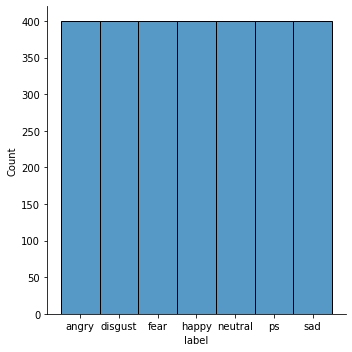

In [8]:
plt.figure(figsize = [8, 8])
sns.displot(df['label'])

In [9]:
import librosa.display
def waveplot(data, sr, emotion):
    plt.figure(figsize = [10, 8])
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr = sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = [11, 4])
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

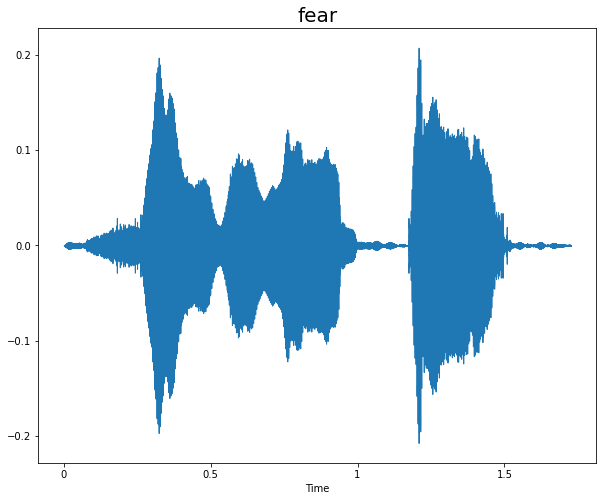

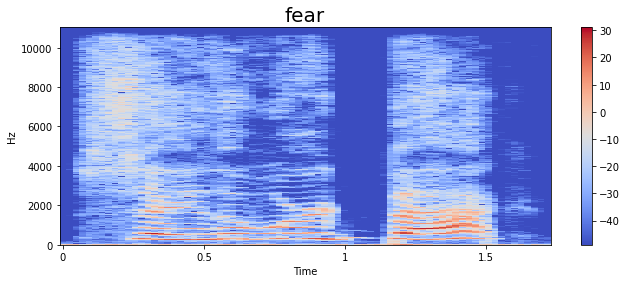

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

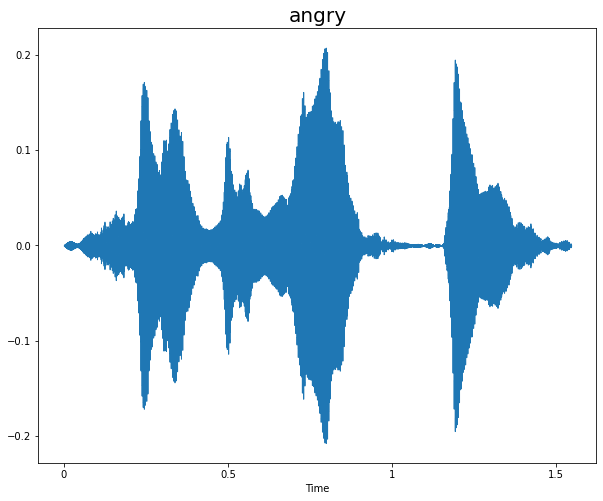

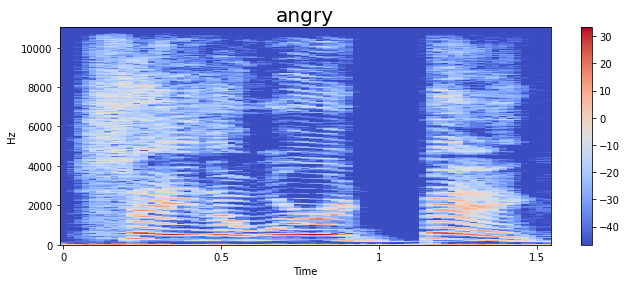

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

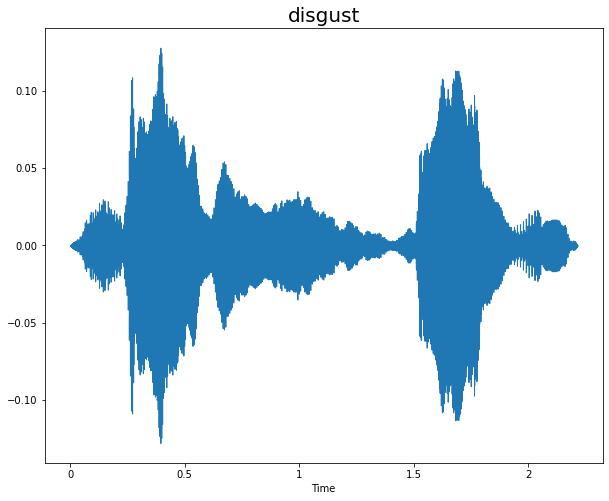

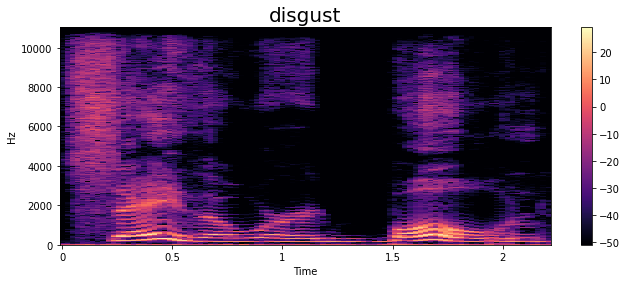

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[8]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

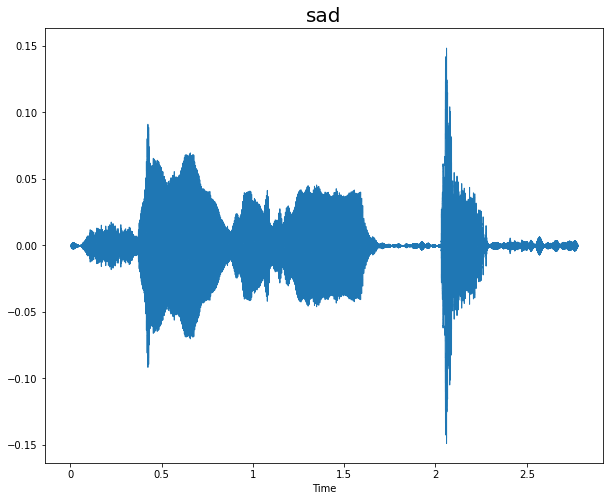

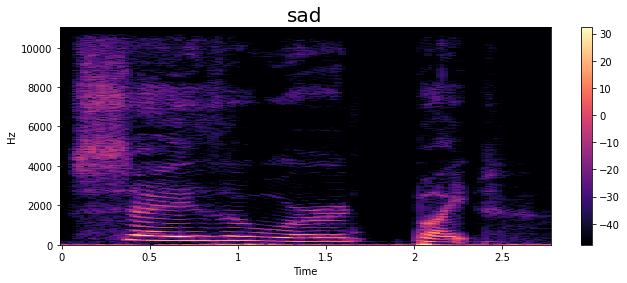

In [13]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[6]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

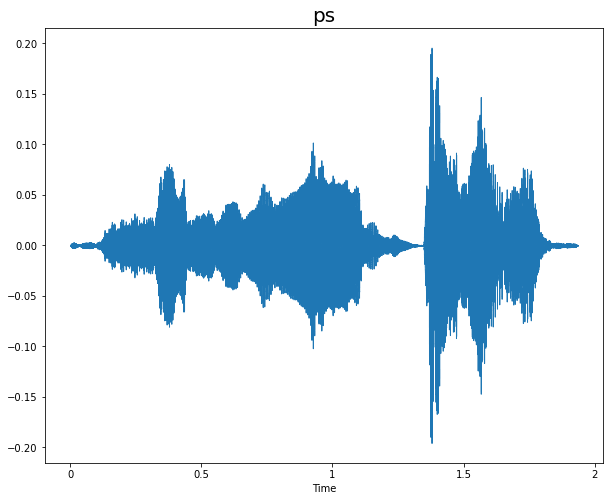

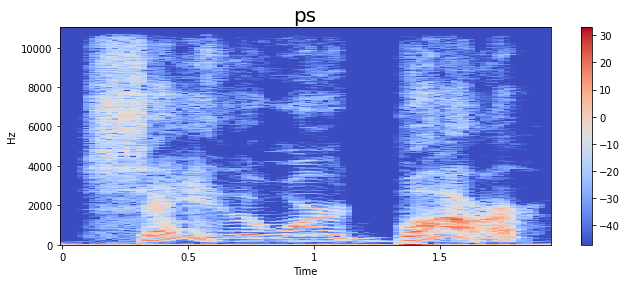

In [14]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

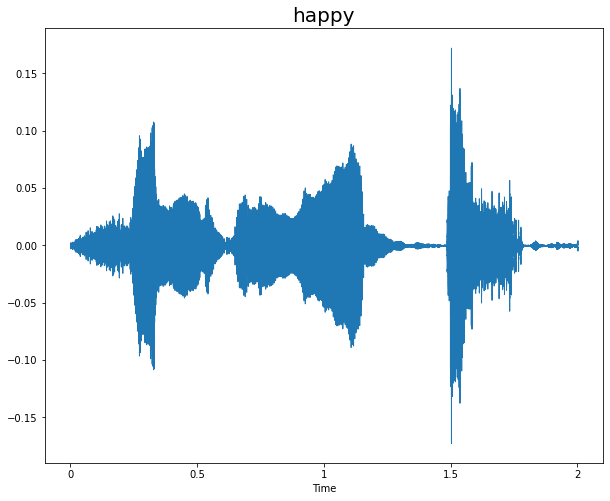

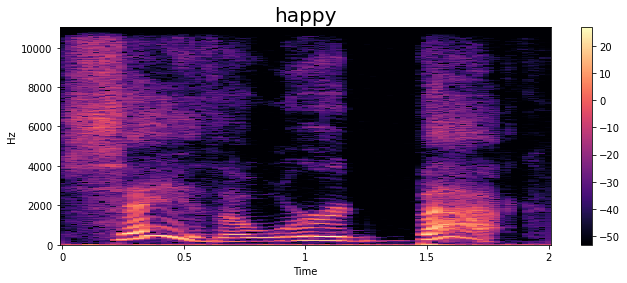

In [15]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature extraction

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [17]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [18]:
# def compute_spectrogram(audio_file, n_fft=2048, hop_length=512, sr=22050):
#     # load audio data
#     y, sr = librosa.load(audio_file, sr=sr)

#     # compute spectrogram
#     spec = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
#     spec_db = librosa.amplitude_to_db(abs(spec))

#     return spec_db, sr

# def plot_spectrogram(spec_db, sr, hop_length=512):
#     # visualize spectrogram
#     plt.figure(figsize=(12, 6))
#     librosa.display.specshow(spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title('Spectrogram')
#     plt.tight_layout()
#     plt.show()

In [19]:
# # compute spectrogram
# spec_db, sr = compute_spectrogram(df['speech'][5])

# # plot spectrogram
# plot_spectrogram(spec_db, sr)

In [20]:
# def extract_chroma_features(audio_file, sr=22050, n_fft=2048, hop_length=512):
#     # Load audio data
#     y, sr = librosa.load(audio_file, sr=sr)

#     # Compute chroma features
#     chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

#     # Normalize chroma features
#     chroma_norm = librosa.util.normalize(chroma, norm=np.inf, axis=1)

#     return chroma_norm

In [21]:
# # Extract chroma features
# chroma = extract_chroma_features(df['speech'][0])
# chroma

In [23]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [24]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [25]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [27]:
y = y.toarray()

# Training LSTM Model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Iterable)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [35]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler_callback = LearningRateScheduler(scheduler)

history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, callbacks=[model_checkpoint_callback, lr_scheduler_callback])

Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.9790
Epoch 1: val_accuracy improved from -inf to 0.97679, saving model to best_model.h5
35/35 [==============================] - 5s 142ms/step - loss: 0.0680 - accuracy: 0.9790 - val_loss: 0.0545 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9888
Epoch 2: val_accuracy improved from 0.97679 to 0.98036, saving model to best_model.h5
35/35 [==============================] - 4s 123ms/step - loss: 0.0445 - accuracy: 0.9888 - val_loss: 0.0507 - val_accuracy: 0.9804 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9830
Epoch 3: val_accuracy improved from 0.98036 to 0.98393, saving model to best_model.h5
35/35 [==============================] - 5s 133ms/step - loss: 0.0593 - accuracy: 0.9830 - val_loss: 0.0471 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 4/50
35/35 [=============

Epoch 28/50
35/35 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 28: val_accuracy did not improve from 1.00000
35/35 [==============================] - 4s 128ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.3642e-04 - val_accuracy: 1.0000 - lr: 1.6530e-04
Epoch 29/50
35/35 [==============================] - ETA: 0s - loss: 5.6640e-04 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 1.00000
35/35 [==============================] - 5s 144ms/step - loss: 5.6640e-04 - accuracy: 1.0000 - val_loss: 1.1090e-04 - val_accuracy: 1.0000 - lr: 1.4957e-04
Epoch 30/50
35/35 [==============================] - ETA: 0s - loss: 3.9172e-04 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 1.00000
35/35 [==============================] - 5s 141ms/step - loss: 3.9172e-04 - accuracy: 1.0000 - val_loss: 9.1938e-05 - val_accuracy: 1.0000 - lr: 1.3534e-04
Epoch 31/50
35/35 [==============================] - ETA: 0s - loss: 3.8142e-04 - accur

# Plot the results

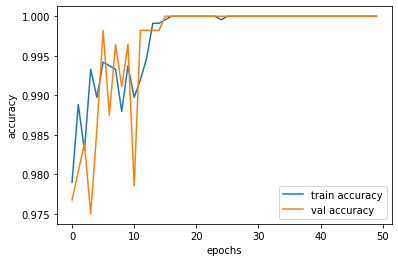

In [36]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

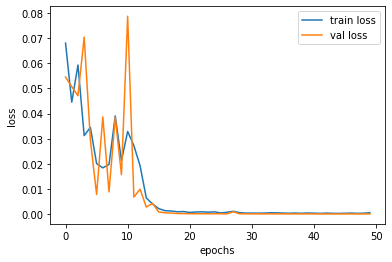

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model.h5')

# Load the new audio file
path_to_audio = 'angry_adio.mp3'
audio, sr = librosa.load(path_to_audio, sr=22050, duration=3, offset=0.5)

# Extract the MFCC features
mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T, axis=0)

# Reshape the extracted MFCC features to match the input shape of the trained model
mfccs = mfccs.reshape(1, -1)

# Normalize the extracted MFCC features using the same normalization parameters used during training
mean = np.load('mean.npy')
std = np.load('std.npy')
mfccs = (mfccs - mean) / std

# Use the predict() function of the trained model to get the predicted emotion label
prediction = model.predict(mfccs)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
predicted_emotion = emotion_labels[np.argmax(prediction)]

print(f'The predicted emotion is: {predicted_emotion}')